# Generative Adversarial Network
The goal is to generate handwritten digits !

## Imports

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import gridspec
import numpy as np

from IPython.display import clear_output

## Import dataset

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Method for displaying images

In [3]:
def display_images(samples):
    fig = plt.figure(figsize=(10,10))
    gs = gridspec.GridSpec(10,10)
    
    for i, img in enumerate(samples):
        plt.subplot(gs[i])
        plt.axis('off')
        plt.imshow(img.reshape(28, 28), cmap='Greys')
    
    return fig


## Test : displaying images

In [4]:
images = mnist.train.images[0:100]

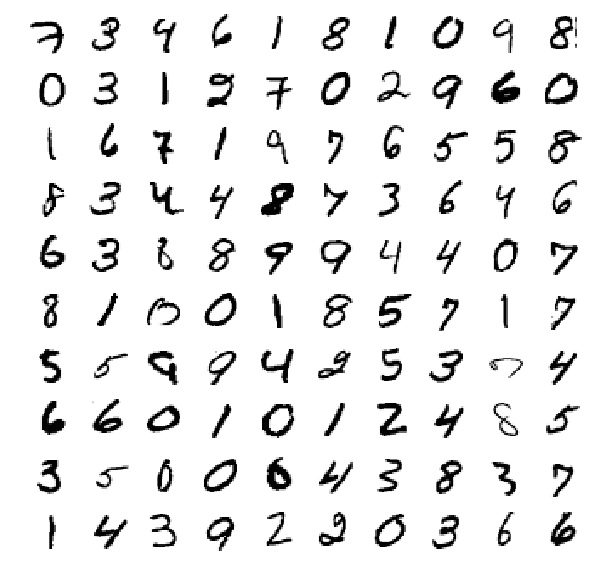

In [5]:
display_images(images)

## GAN Model

In [6]:
X = tf.placeholder(tf.float32, [None, 784])
Z = tf.placeholder(tf.float32, [None, 64])

# Discriminator
#D_W1 = tf.Variable(tf.truncated_normal([784, 100], stddev=0.1))
#D_B1 = tf.Variable(tf.zeros([100]))

#D_W2 = tf.Variable(tf.truncated_normal([100, 1], stddev=0.1))
#D_B2 = tf.Variable(tf.zeros([1]))

K = 8
L = 16
M = 24

D_W1 = tf.Variable(tf.truncated_normal([6, 6, 1, K], stddev=0.1))
D_B1 = tf.Variable(tf.zeros([K]))

D_W2 = tf.Variable(tf.truncated_normal([6, 6, K, L], stddev=0.1))
D_B2 = tf.Variable(tf.zeros([L]))

D_W3 = tf.Variable(tf.truncated_normal([5, 5, L, M], stddev=0.1))
D_B3 = tf.Variable(tf.zeros([M]))

D_W4 = tf.Variable(tf.truncated_normal([7*7*M, 200], stddev=0.1))
D_B4 = tf.Variable(tf.zeros([200]))

D_W5 = tf.Variable(tf.truncated_normal([200, 10], stddev=0.1))
D_B5 = tf.Variable(tf.zeros([10]))

# Generator
G_W1 = tf.Variable(tf.truncated_normal([64, 100], stddev=0.1))
G_B1 = tf.Variable(tf.zeros([100]))

G_W2 = tf.Variable(tf.truncated_normal([100, 784], stddev=0.1))
G_B2 = tf.Variable(tf.zeros([784]))

In [7]:
theta_D = [D_W1, D_W2, D_W3, D_W4, D_W5, D_B1, D_B2, D_B3, D_B4, D_B5]
theta_G = [G_W1, G_W2, G_B1, G_B2]

In [8]:
def discriminator(X):
    # D_h1 = tf.nn.relu(tf.add(tf.matmul(X, D_W1), D_B1))
    # D_logits = tf.add(tf.matmul(D_h1, D_W2), D_B2)
    X_reshape = tf.reshape(X, (-1, 28, 28, 1))
    print(X_reshape.shape)
    
    Y1 = tf.nn.relu( tf.nn.conv2d(X_reshape, D_W1, strides=[1, 1, 1, 1], padding='SAME') + D_B1)
    Y2 = tf.nn.relu( tf.nn.conv2d(Y1, D_W2, strides=[1, 2, 2, 1], padding='SAME') + D_B2)
    Y3 = tf.nn.relu( tf.nn.conv2d(Y2, D_W3, strides=[1, 2, 2, 1], padding='SAME') + D_B3)

    Y3_flat = tf.reshape(Y3, [-1, 7*7*M])

    Y4 = tf.nn.relu( tf.matmul(Y3_flat, D_W4) + D_B4 )
    D_logits = tf.matmul(Y4, D_W5) + D_B5

    return  tf.nn.sigmoid(D_logits)

In [9]:
def generator(Z):
    G_h1 = tf.nn.relu(tf.add(tf.matmul(Z, G_W1), G_B1))
    G_logits = tf.add(tf.matmul(G_h1, G_W2), G_B2)
    
    return tf.nn.sigmoid(G_logits)

### The magic'

In [10]:
G_sample = generator(Z)
D_real_prob = discriminator(X)
D_fake_prob = discriminator(G_sample)

(?, 28, 28, 1)
(?, 28, 28, 1)


In [11]:
D_accuracy_real = tf.reduce_mean(D_real_prob)
D_accuracy_fake = tf.reduce_mean(D_fake_prob)

In [12]:
def log(x):
    return tf.log(x + 1e-6)

Why I need to do that ??

### Loss

In [13]:
D_loss = - tf.reduce_mean(log(D_real_prob) + log(1. - D_fake_prob))
G_loss = - tf.reduce_mean(log(D_fake_prob))

### Model

In [14]:
D_solver = tf.train.AdamOptimizer(0.0001).minimize(D_loss, var_list=theta_D)
G_solver = tf.train.AdamOptimizer(0.0001).minimize(G_loss, var_list=theta_G)

### Start the model

In [15]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

### Generate noise

In [16]:
def generate_noise(m, n):
    return np.random.uniform(-1., 1., size=[m, n])

### Training

In [ ]:
i = 0

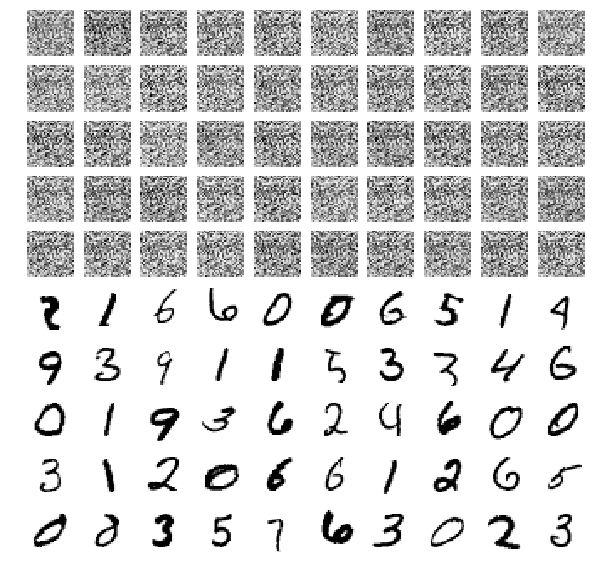

In [ ]:
for it in range(100000):
    batch_xs, _ = mnist.train.next_batch(100)
    Z_gen = generate_noise(100, 64)
    
    # TODO : refactoring
    # TODO : try with better check for learning. Inspiration : https://github.com/llSourcell/Generative_Adversarial_networks_LIVE/blob/master/EZGAN.ipynb
    # TODO : use tensorboard
    # TODO : dete the first plot of plt    
    
    DPROB_real = sess.run(D_accuracy_real, feed_dict={X: batch_xs})
    # print('real : {}'.format(DPROB_real))
    
    DPROB_fake = sess.run(D_accuracy_fake, feed_dict={X: batch_xs, Z: Z_gen})
    # print('fake : {}'.format(DPROB_fake))
    
    # When I comment the train of G_solver, I have 1 for the first
    # and 0 for the last
    # with that I can calculate the accuracy and modify the learning
    # Maybe 55%-60% is good to stop the learning of the discriminator    
    
    if (DPROB_fake > 0.55 or DPROB_real < 0.45):
        sess.run(D_solver, feed_dict={X: batch_xs, Z: Z_gen})    
    sess.run(G_solver, feed_dict={Z: Z_gen})
    
    if it % 10 == 0:
        samples = sess.run(G_sample, feed_dict={Z: Z_gen})
        output = np.concatenate((samples[0:50], batch_xs[0:50]), axis=0)
        fig = display_images(output)
        clear_output()
        plt.show()
        plt.savefig('output/{}'.format(str(i).zfill(3)), bbox_iniches='tight')
        plt.close(fig)
        i += 1

The first 50 images on the head of the images have been generated by the generative model.
The 50 images below are real examples from MNIST dataset